# PREPARED BY Tathagata Mookherjee
# IIT JODHPUR
# ROLL NUMBER - M21AI619
# DATE : 19/03/2022
# MAL7080 Mathematical Modeling and Simulations

In [120]:
import numpy as np
import matplotlib.pyplot as plt

1. Implement the mid point method, Heun method and RK4 method for first order ODEs.

First we are creating multiple functions for first order differential equations that will be used

In [121]:
#################################
#function to return Euler solution
#################################
def getEuler(func, y0, N, h, T):
    
    #creating Euler solution container initialized to 0
    Y = np.zeros(N+1).reshape(N+1, 1)

    #first Euler solution set to y0
    Y[0] = y0

    #using Euler method to find rest of the solutions
    for n in range(0,len(T)-1):
        Y[n+1] = Y[n] + h*(func(T[n],Y[n]))

    return Y

#################################
#function to return Heun solution
#################################
def getHeun(func, y0, N, h, T):
    #creating Heun solution container initialized to 0
    Y = np.zeros(N+1).reshape(N+1, 1)

    #first Heun solution set to y0
    Y[0] = y0

    #using Heun method to find rest of the solutions
    for n in range(0,len(T)-1):
        Ytemp = Y[n] + h*(func(T[n],Y[n]))
        Y[n+1] = Y[n] + h/2*(func(T[n],Y[n])+func(T[n+1],Ytemp))

    return Y

#################################
#function to return MidPoint solution
#################################
def getMidPoint(func, y0, N, h, T):
    #creating MidPoint solution container initialized to 0
    Y = np.zeros(N+1).reshape(N+1, 1)

    #first MidPoint solution set to y0
    Y[0] = y0

    #using MidPoint method to find rest of the solutions
    for n in range(0,len(T)-1):
        Ytemp = Y[n] + h/2*(func(T[n],Y[n]))
        Ttemp=(T[n]+T[n+1])/2
        Y[n+1] = Y[n] + h*func(Ttemp,Ytemp)

    return Y

#################################
#function to return RK4 solution
#################################
def getRK4(func, y0, N, h, T):
    #creating RK solution container initialized to 0
    Y = np.zeros(N+1).reshape(N+1, 1)

    #first RK solution set to y0
    Y[0] = y0

    #using RK method to find rest of the solutions
    for n in range(0,len(T)-1):
        k1 = func(T[n],Y[n])
        k2 = func(T[n]+(h/2),Y[n]+(k1*h/2))
        k3 = func(T[n]+(h/2),Y[n]+(k2*h/2))
        k4 = func(T[n]+h,Y[n]+(k3*h))
        Y[n+1] = Y[n] + h/6*(k1+(2*k2)+(2*k3)+k4)

    return Y

In [122]:
#############################################################################
#finding best solution among Euler, Heun, MidPoint, RK4 and plotting the same
#############################################################################
def getBestSolution(func, tstart, tend, y0, N, errlimit):

    #calculating initial values for N=1

    #step length
    h = (tend-tstart)/1

    #creating timestamp array based on start-point, end-point and number-of-steps
    #T is instantiated to 2 elements as we shall be adding y0 to the initial
    # value of the solution array. Hence the 1 extra timestamp is required for the initial T
    T = np.linspace(tstart, tend, 2).reshape(2, 1)

    #initial solution at iteration 1 used to populate all variables
    Yold=getEuler(func, y0, 1, h, T)
    Ynew=getEuler(func, y0, 1, h, T)
    Hold=getHeun(func, y0, 1, h, T)
    Hnew=getHeun(func, y0, 1, h, T)
    Mold=getMidPoint(func, y0, 1, h, T)
    Mnew=getMidPoint(func, y0, 1, h, T)
    Rold=getRK4(func, y0, 1, h, T)
    Rnew=getRK4(func, y0, 1, h, T)

    #loop starting from 2 because loop 1 values prepopulated above
    for i in range(2, N, 1):
        h = (tend-tstart)/i #new step length
        T = np.linspace(tstart, tend, i+1).reshape(i+1, 1) #updated timestamp array

        #new values based on ith position in the timestamp array
        Ynew=getEuler(func, y0, i, h, T)
        Hnew=getHeun(func, y0, i, h, T)
        Mnew=getMidPoint(func, y0, i, h, T)
        Rnew=getRK4(func, y0, i, h, T)
        
        #error calculated as norm(N)-norm(N+1)
        Yerr=np.absolute(np.linalg.norm(Yold)-np.linalg.norm(Ynew))
        Herr=np.absolute(np.linalg.norm(Hold)-np.linalg.norm(Hnew))
        Merr=np.absolute(np.linalg.norm(Mold)-np.linalg.norm(Mnew))
        Rerr=np.absolute(np.linalg.norm(Rold)-np.linalg.norm(Rnew))

        #create array of errors to find minimum error, for comparison later
        errArray= np.array([Yerr, Herr, Merr, Rerr])
        #get lowest error
        minErr = np.amin(errArray)
        #get lowest error position
        minErrPos = np.where(errArray == np.amin(errArray))[0]

        #from lowest error position get the corresponding solution process
        bestProcess = ''
        if minErrPos == 0:
            bestProcess = 'Euler'
        elif minErrPos == 1:
            bestProcess = 'Heun'
        elif minErrPos == 2:
            bestProcess = 'MidPoint'
        elif minErrPos == 3:
            bestProcess = 'RK4'

        #check if minErr <= errlimit, if yes then the best solution has been found
        if minErr <= errlimit:
            print('Best solution is '+str(bestProcess)+' with,')
            print('Error: '+str(minErr))
            print('Step count: '+str(i))
            print('Step length: '+str(h))
            #plot the curve for the bestProcess
            plt.figure(figsize = (16, 9))
            plt.rcParams.update({'font.size': 14})
            plt.grid(True)
            plt.title("Best solution for start point="+str(tstart)+', end point='+str(tend)+', initial value='+str(y0)+', error limit='+str(errlimit))
            if minErrPos == 0:
                plt.plot(T, Ynew, 'b*-')
            elif minErrPos == 1:
                plt.plot(T, Hnew, 'b*-')
            elif minErrPos == 2:
                plt.plot(T, Mnew, 'b*-')
            elif minErrPos == 3:
                plt.plot(T, Rnew, 'b*-')
            plt.legend([bestProcess])
            plt.show()
            break
        else:
            # if the lowest minErr is not less than errlimit then varOld is set to varNew
            # and then varNew gets populated with the new solution in the next iteration
            Yold=Ynew
            Hold=Hnew
            Mold=Mnew
            Rold=Rnew
    
    #plot everything
    plt.figure(figsize = (16, 9))
    plt.rcParams.update({'font.size': 14})
    plt.grid(True)
    plt.title("RK4 - MidPoint - Euler - Heun")
    plt.plot(T, Rnew, 'c*-', T, Mnew, 'r*-', T, Ynew, 'g*-', T, Hnew, 'b*-')
    plt.legend(['RK4, Error: '+str(Rerr), 'MidPoint, Error: '+str(Merr), 'Euler, Error: '+str(Yerr), 'Heun, Error: '+str(Herr)])
    plt.show()

Now we shall be solving mutiple first order differential equations using the above

Solution example 1: Plotting a tan curve

Best solution is MidPoint with,
Error: 0.02857924470229989
Step count: 30
Step length: 0.2


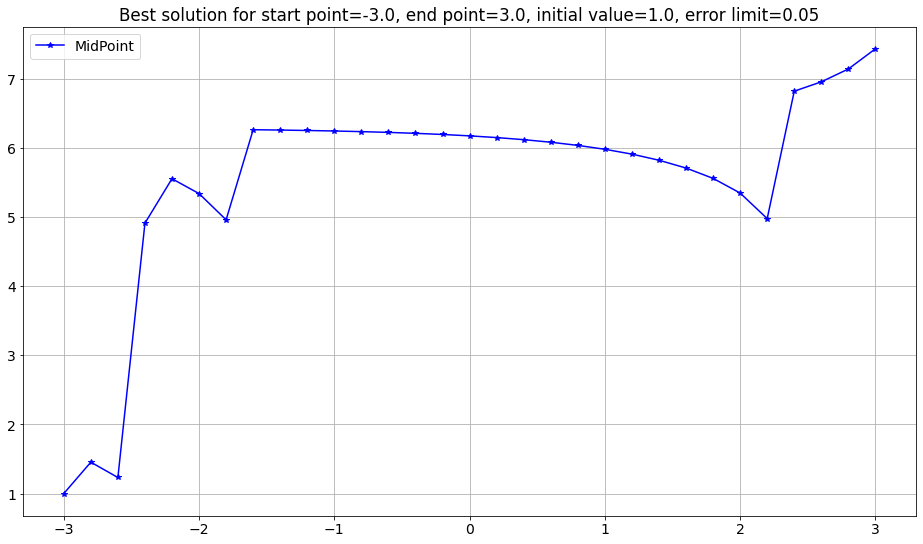

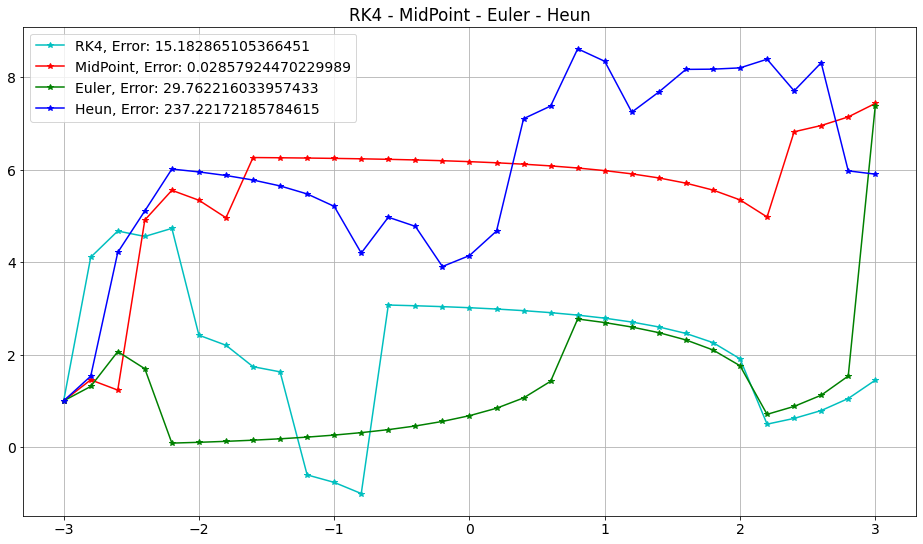

In [123]:
func = lambda t, y: np.tan(y) #first ODE function
tstart=-3.0 #start-point
tend=3.0 #end-point
y0=1.0 #initial value
N=1000 #maximum number of steps to take, this is needed to avoid going into infinite loops
errlimit=0.05 #error threshold set to 5%

getBestSolution(func, tstart, tend, y0, N, errlimit)

Solution example 2: Plotting a sine curve

Best solution is Euler with,
Error: 0.0499869294664137
Step count: 624
Step length: 0.00641025641025641


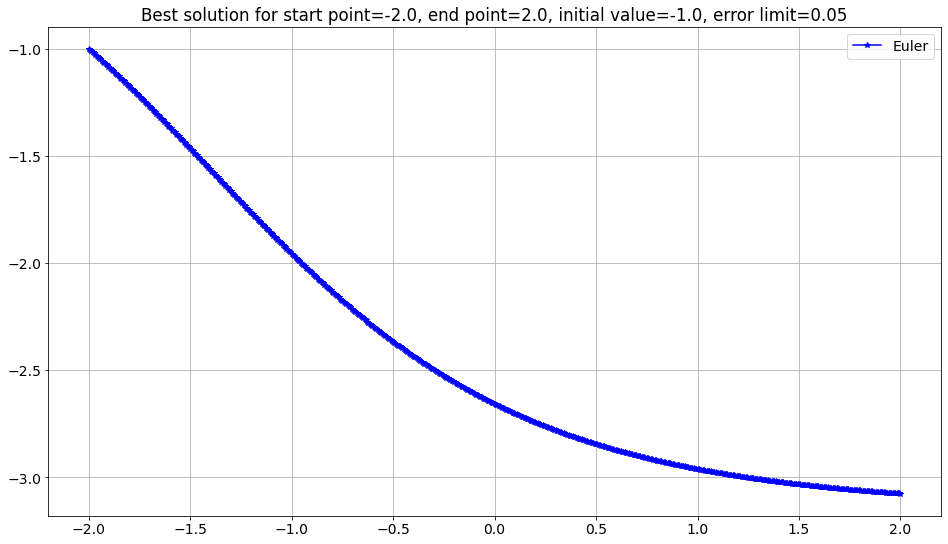

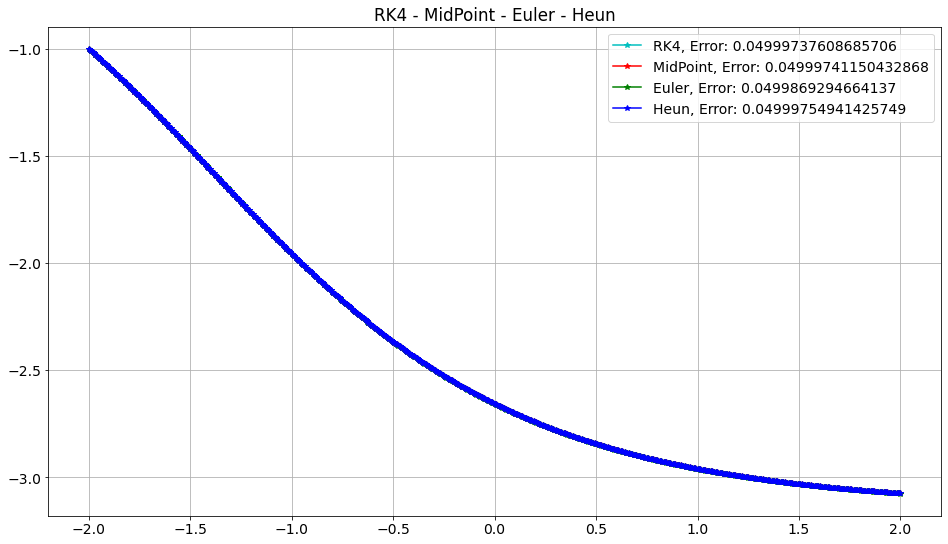

In [124]:
func = lambda t, y: np.sin(y) #first ODE function
tstart=-2.0 #start-point
tend=2.0 #end-point
y0=-1.0 #initial value
N=1000 #maximum number of steps to take, this is needed to avoid going into infinite loops
errlimit=0.05 #error threshold set to 5%

getBestSolution(func, tstart, tend, y0, N, errlimit)

Solution example 3: Plotting a linear equation with time component

Best solution is Euler with,
Error: 0.049541267085422724
Step count: 41
Step length: 0.024390243902439025


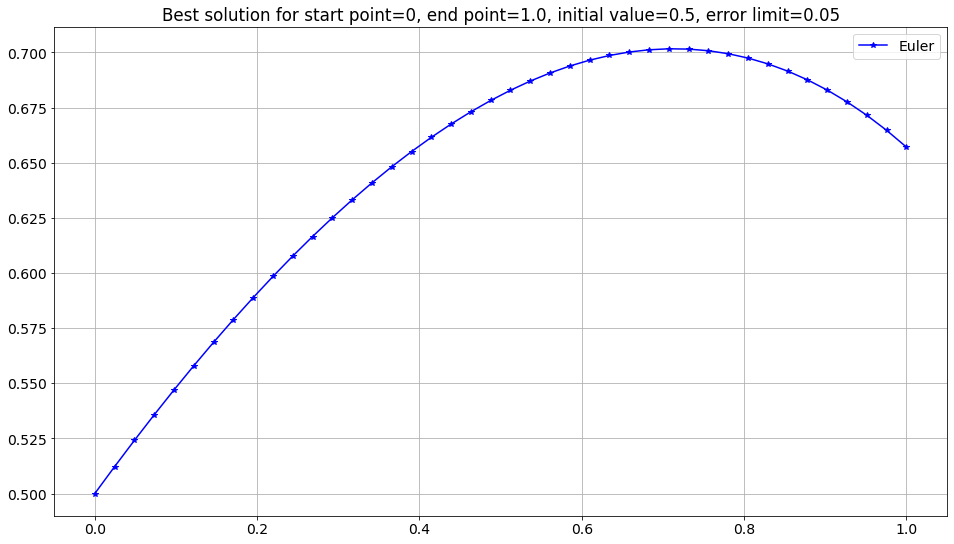

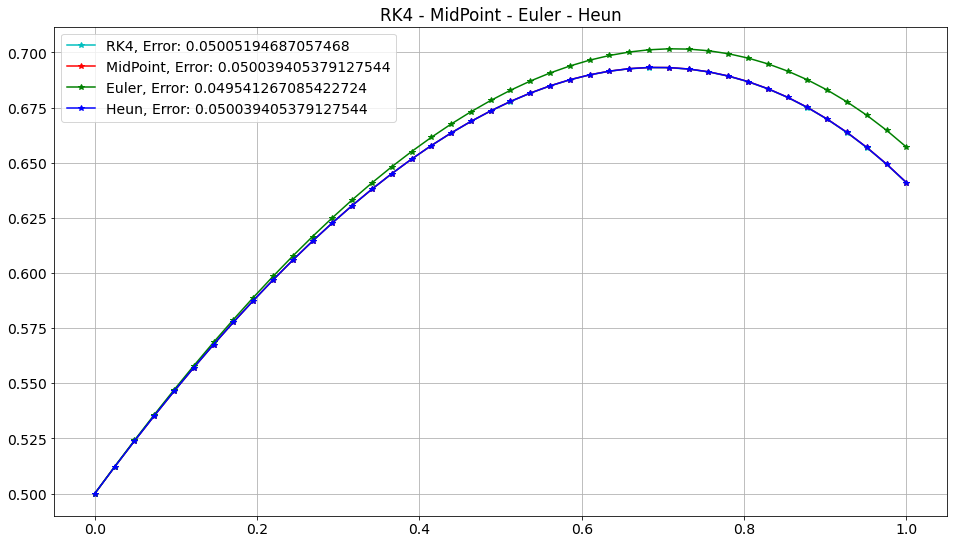

In [125]:
func = lambda t, y: y-t #first ODE function
tstart=0 #start-point
tend=1.0 #end-point
y0=0.5 #initial value
N=1000 #maximum number of steps to take, this is needed to avoid going into infinite loops
errlimit=0.05 #error threshold set to 5%

getBestSolution(func, tstart, tend, y0, N, errlimit)

Solution example 4: Plotting an exponential curve

Best solution is RK4 with,
Error: 0.049962718714994026
Step count: 189
Step length: 0.005291005291005291


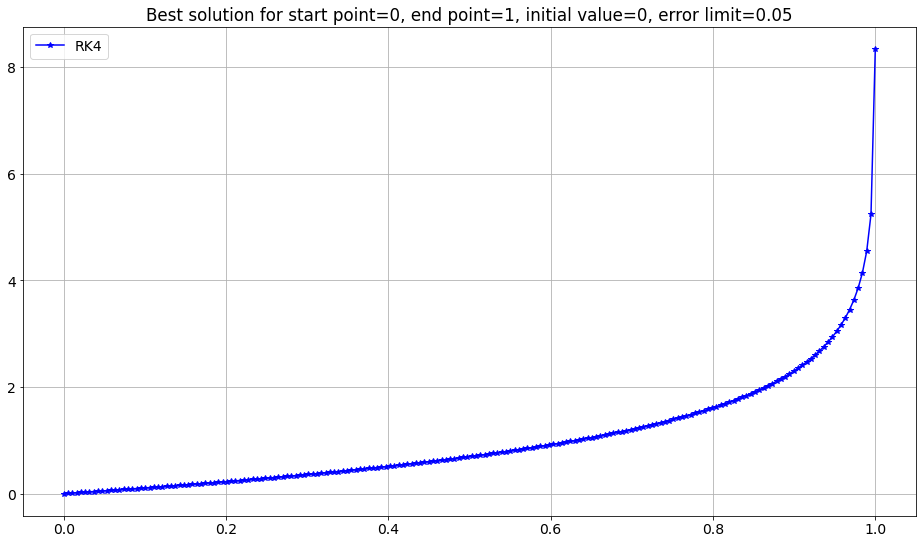

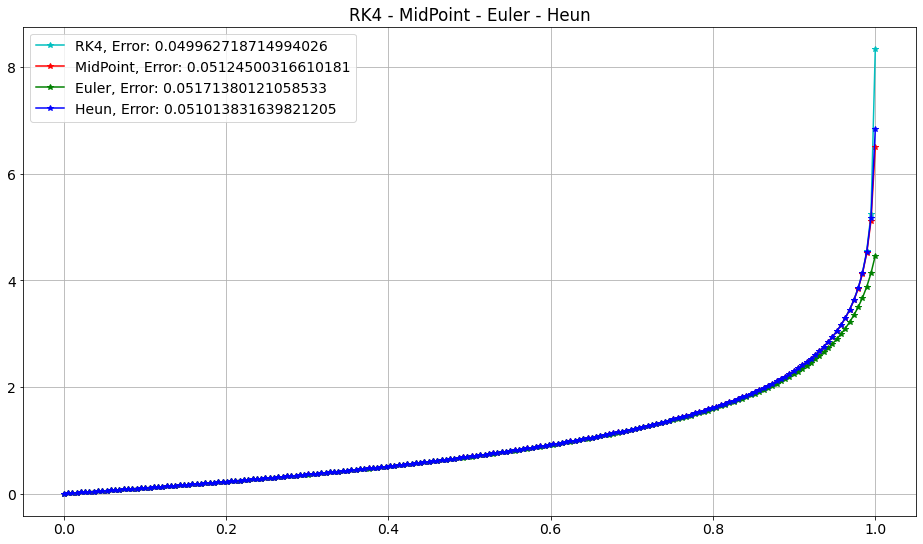

In [126]:

func = lambda t, y: np.exp(y) #first ODE function
tstart=0 #start-point
tend=1 #end-point
y0=0 #initial value
N=1000 #maximum number of steps to take, this is needed to avoid going into infinite loops
errlimit=0.05 #error threshold set to 5%

getBestSolution(func, tstart, tend, y0, N, errlimit)

2. Implement the Euler method and the above methods for higher order ODEs.

First we are creating multiple functions for higher order differential equations that will be used

In [127]:
#################################
#function to return RK4 solution
#################################
def getHigherRK4(func,Y,h,t):
    k1 = func(t,Y)
    k2 = func(t+(h/2),Y+(k1*h/2))
    k3 = func(t+(h/2),Y+(k2*h/2))
    k4 = func(t+h,Y+(k3*h))
    return Y + h/6*(k1+(2*k2)+(2*k3)+k4)

#################################
#function to return Heun solution
#################################
def getHigherHeun(func,Y,h,t,tnext):
    Ytemp = Y + h*(func(t,Y))
    return Y + h/2*(func(t,Y)+func(tnext,Ytemp))

#################################
#function to return MidPoint solution
#################################
def getHigherMidPoint(func,Y,h,t,tnext):
    Ytemp = Y + h/2*(func(t,Y))
    Ttemp=(t+tnext)/2
    return Y + h*func(Ttemp,Ytemp)

#################################
#function to return Euler solution
#################################
def getHigherEuler(func,Y,h,t):
    return Y + h*(func(t,Y))

In [128]:

#############################################################################
#finding best solution among Euler, Heun, MidPoint, RK4 and plotting the same
#############################################################################
def getHigherSolution(func, tstart, tend, y0, N, errlimit, sol):
    h = (tend-tstart)/N
    outtime=[]
    out1=[]
    out2=[]
    bestSolFlag=False
    step=1
    for i in range(1, N, step):
        h = (tend-tstart)/i #new step length
        tnext=i+step
        outtime.append(i)
        out2.append(y0[1])
        out1.append(y0[0])
        if sol == 'RK4':
            y0=getHigherRK4(func, y0,h,i)
        elif sol == 'Heun':
            y0=getHigherHeun(func, y0,h,i,tnext)
        elif sol == 'MidPoint':
            y0=getHigherMidPoint(func, y0,h,i,tnext)
        elif sol == 'Euler':
            y0=getHigherEuler(func, y0,h,i)
        out1Err=np.absolute(out1[i-1]-out1[i-2])
        out2Err=np.absolute(out2[i-1]-out2[i-2])
        if i > 1:
            if out1Err <= errlimit and out2Err <= errlimit:
                bestSolFlag=True
                break
    
    if bestSolFlag == False:
        print('Best solution could not be found using '+sol+',')
        print('Error: '+str(out1Err))
        print('Error: '+str(out2Err))
        print('Step count: '+str(i))
        print('Step length: '+str(h))
        print('Start point: '+str(tstart))
        print('End point: '+str(tend))
        print('Error limit: '+str(errlimit))
    else:
        print('Best solution found using '+sol+',')
        print('Error: '+str(out1Err))
        print('Error: '+str(out2Err))
        print('Step count: '+str(i))
        print('Step length: '+str(h))
        print('Start point: '+str(tstart))
        print('End point: '+str(tend))
        print('Error limit: '+str(errlimit))
    plt.figure(figsize = (16, 9))
    plt.rcParams.update({'font.size': 14})
    plt.title('Best solution for '+sol+' with start point='+str(tstart)+', end point='+str(tend)+', error limit='+str(errlimit))
    plt.plot(outtime,out1,'r*-')
    plt.plot(outtime,out2,'b*-')
    plt.legend(['Linear, Error: '+str(out1Err), 'Non-Linear, Error: '+str(out2Err)])
    plt.xlabel("time")
    plt.ylabel("Linear & Non-Linear")
    plt.grid(True)
    plt.show()      

Now we shall be solving mutiple first order differential equations using the above

Solution Example 1: Decreasing sinusoidal curve

Best solution found using Euler,
Error: 0.007756913569000989
Error: 0.009978595465106377
Step count: 2088
Step length: 0.0023946360153256703
Start point: 0
End point: 5.0
Error limit: 0.01


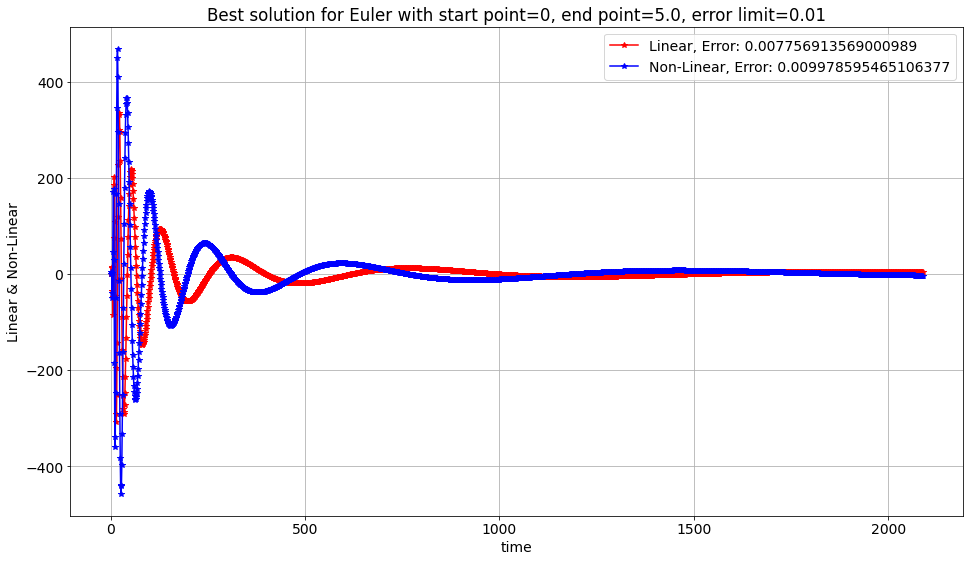

Best solution found using Heun,
Error: 0.00992876495344297
Error: 0.00839967532163155
Step count: 580
Step length: 0.008620689655172414
Start point: 0
End point: 5.0
Error limit: 0.01


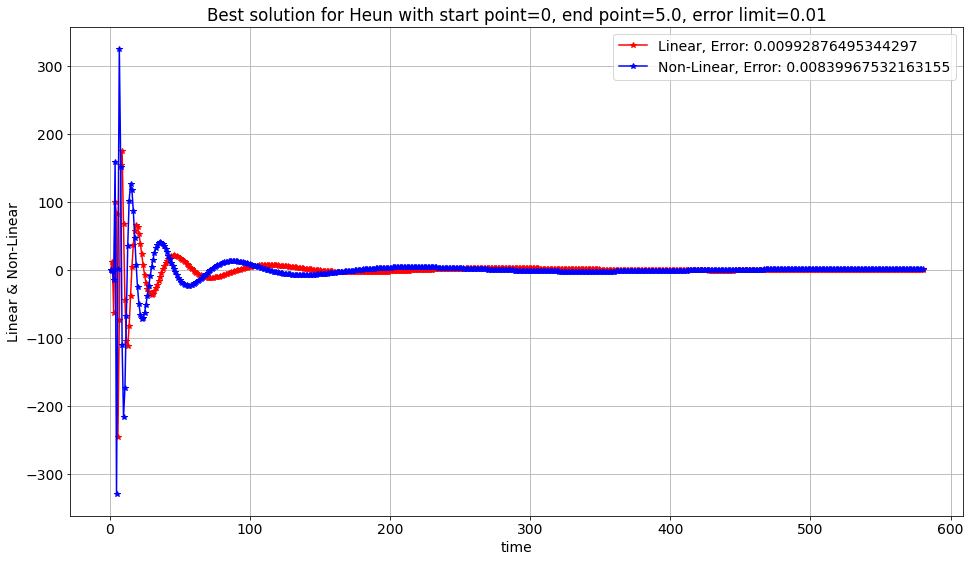

Best solution found using MidPoint,
Error: 0.00992876495344297
Error: 0.00839967532163155
Step count: 580
Step length: 0.008620689655172414
Start point: 0
End point: 5.0
Error limit: 0.01


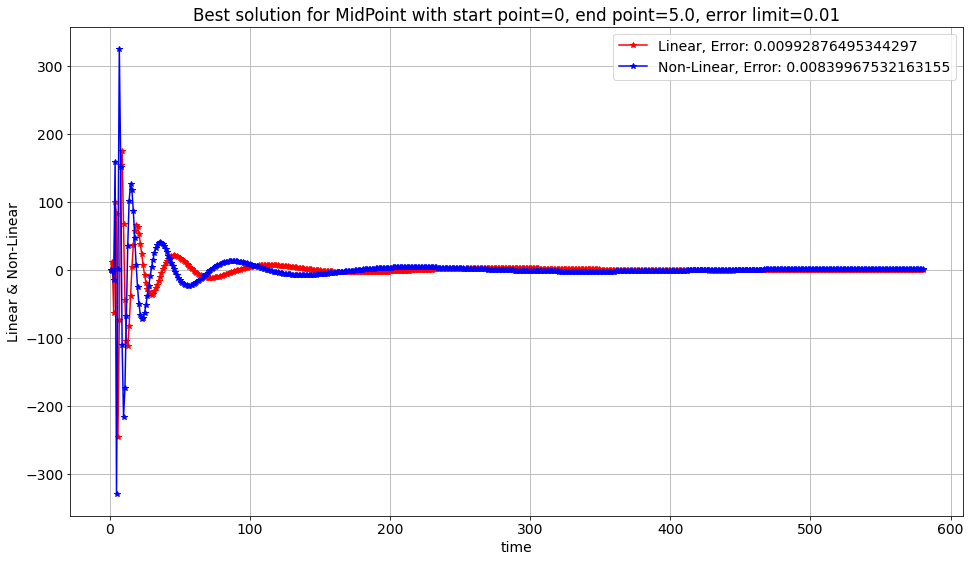

Best solution found using RK4,
Error: 0.006193622867361803
Error: 0.009748830951337328
Step count: 194
Step length: 0.02577319587628866
Start point: 0
End point: 5.0
Error limit: 0.01


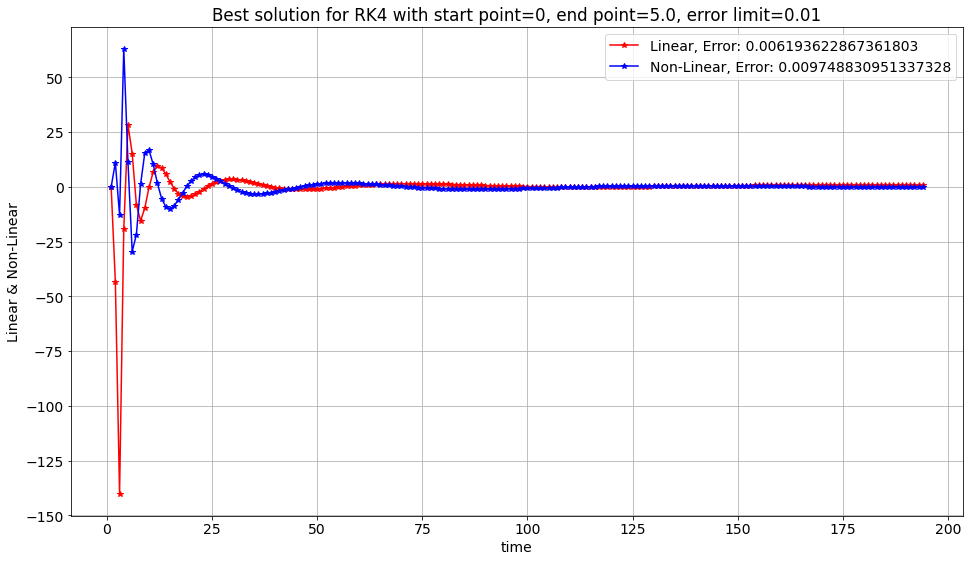

In [129]:
def func(t,Y):
    e=1.0
    l=1.0
    c=0.5
    r=0.5  
    q,i=Y
    f1=i
    f2= (e-i*r-q/c)/l
    return np.array([f1,f2])

tstart=0 #start-point
tend=5.0 #end-point
y0=np.array([0,0]) #initial value
N=10000 #maximum number of steps to take, this is needed to avoid going into infinite loops
errlimit=.01 #error threshold set to 1%
getHigherSolution(func, tstart, tend, y0, N, errlimit,'Euler')
getHigherSolution(func, tstart, tend, y0, N, errlimit,'Heun')
getHigherSolution(func, tstart, tend, y0, N, errlimit,'MidPoint')
getHigherSolution(func, tstart, tend, y0, N, errlimit,'RK4')


Solution Example 2: Increasing sinusoidal curve which cannot be stabilized

Best solution could not be found using Euler,
Error: 31.220840324014716
Error: 27.956757230051153
Step count: 9999
Step length: 0.001000100010001
Start point: 0
End point: 10.0
Error limit: 0.1


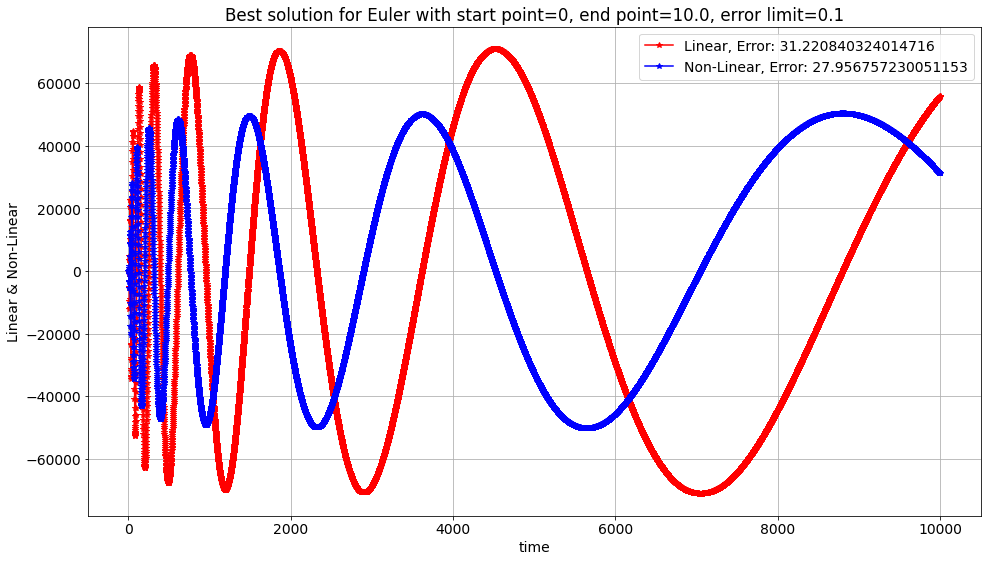

Best solution could not be found using Heun,
Error: 2.9546182247486286
Error: 7.283156969303491
Step count: 9999
Step length: 0.001000100010001
Start point: 0
End point: 10.0
Error limit: 0.1


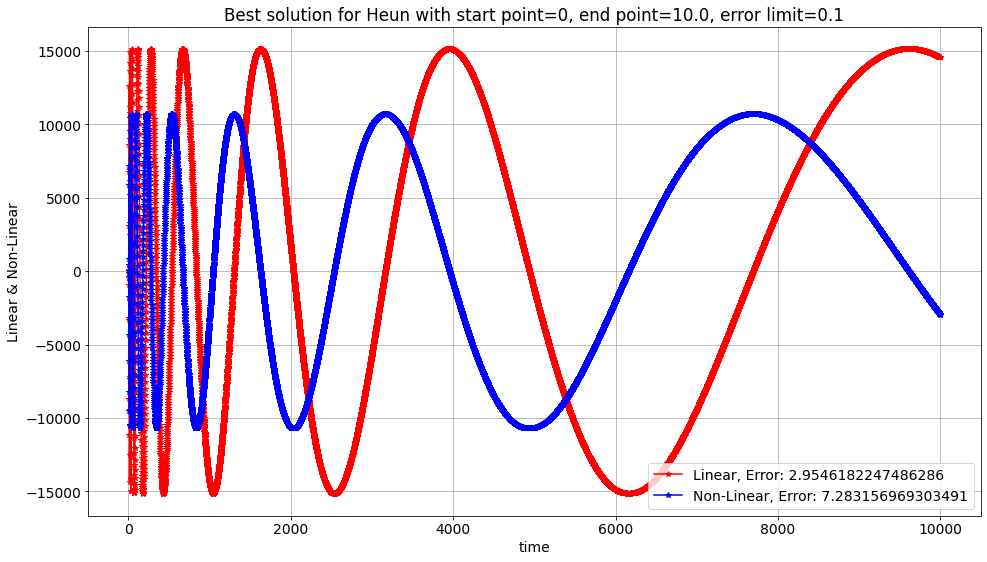

Best solution could not be found using MidPoint,
Error: 2.9546182247486286
Error: 7.283156969303491
Step count: 9999
Step length: 0.001000100010001
Start point: 0
End point: 10.0
Error limit: 0.1


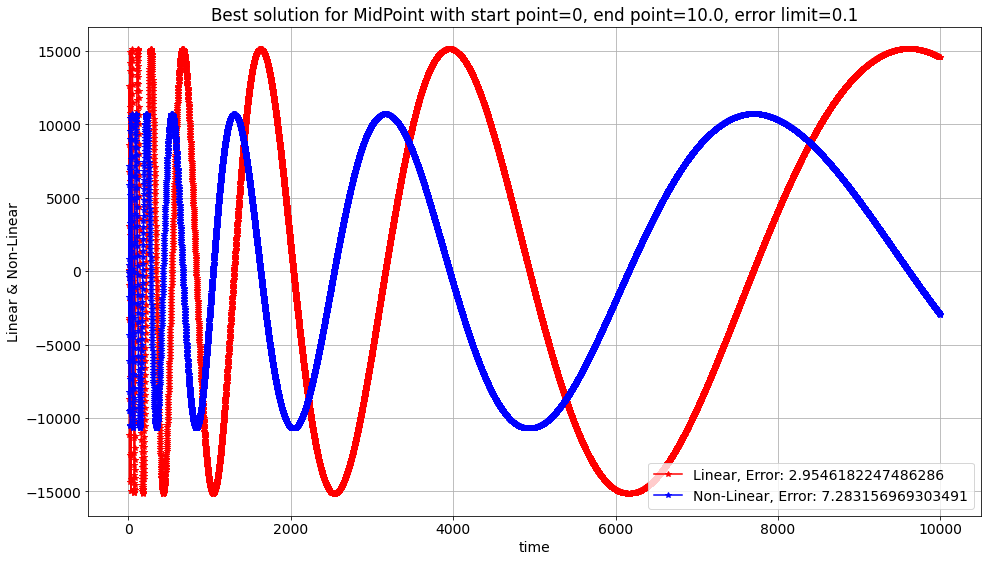

Best solution could not be found using RK4,
Error: 0.7254062974884619
Error: 0.2595677700929855
Step count: 9999
Step length: 0.001000100010001
Start point: 0
End point: 10.0
Error limit: 0.1


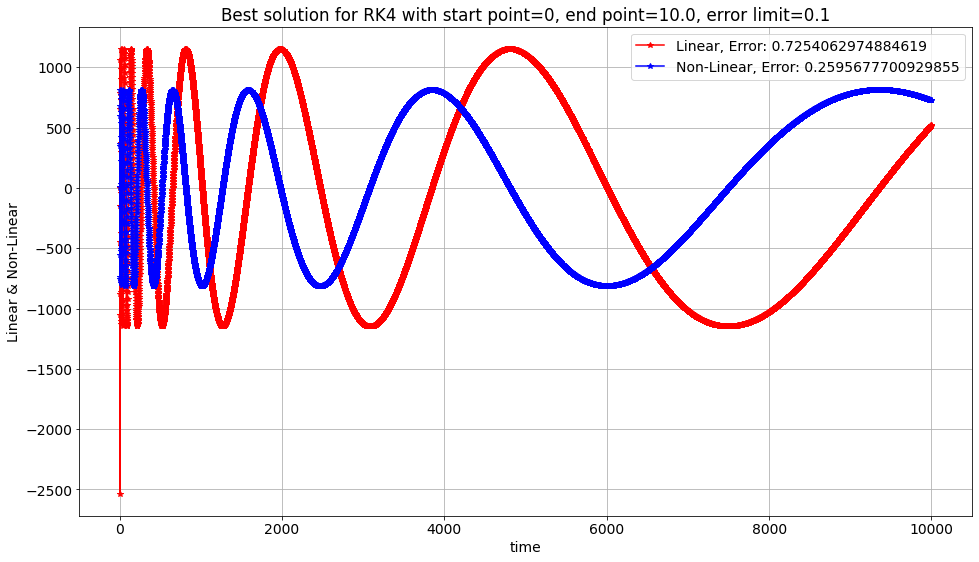

In [130]:
def func(t,Y):
    e=1.0
    l=1.0
    c=0.5
    q,i=Y
    f1=i
    f2= (e-q*c)/l
    return np.array([f1,f2])

tstart=0 #start-point
tend=10.0 #end-point
y0=np.array([1,5]) #initial value
N=10000 #maximum number of steps to take, this is needed to avoid going into infinite loops
errlimit=.1 #error threshold set to 10%
getHigherSolution(func, tstart, tend, y0, N, errlimit,'Euler')
getHigherSolution(func, tstart, tend, y0, N, errlimit,'Heun')
getHigherSolution(func, tstart, tend, y0, N, errlimit,'MidPoint')
getHigherSolution(func, tstart, tend, y0, N, errlimit,'RK4')


Solution Example 3: damped curve

Best solution found using Euler,
Error: 0.0020411498036695176
Error: 0.0029111844763176084
Step count: 18
Step length: 0.5555555555555556
Start point: 0
End point: 10.0
Error limit: 0.01


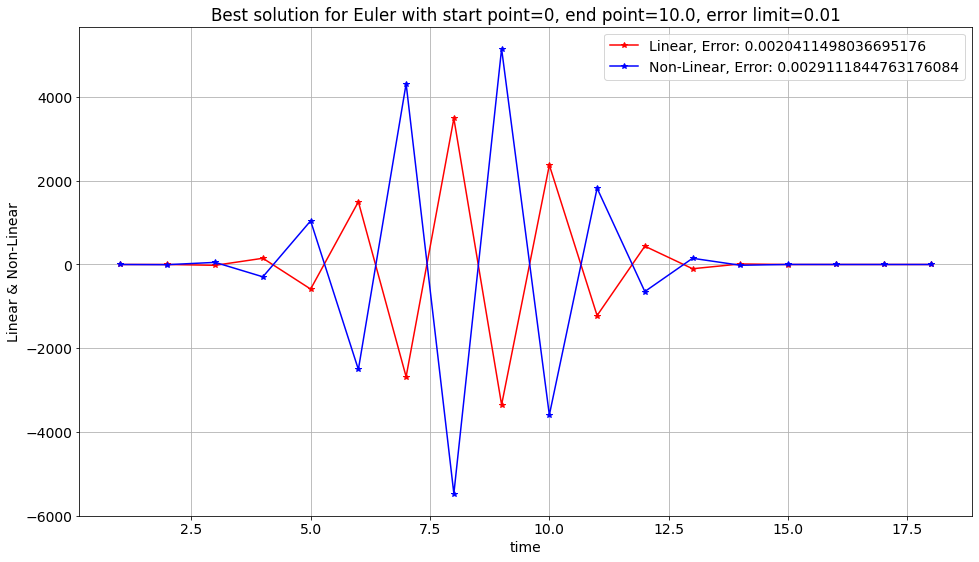

Best solution found using Heun,
Error: 0.004997933065658289
Error: 0.007668338465718343
Step count: 42
Step length: 0.23809523809523808
Start point: 0
End point: 10.0
Error limit: 0.01


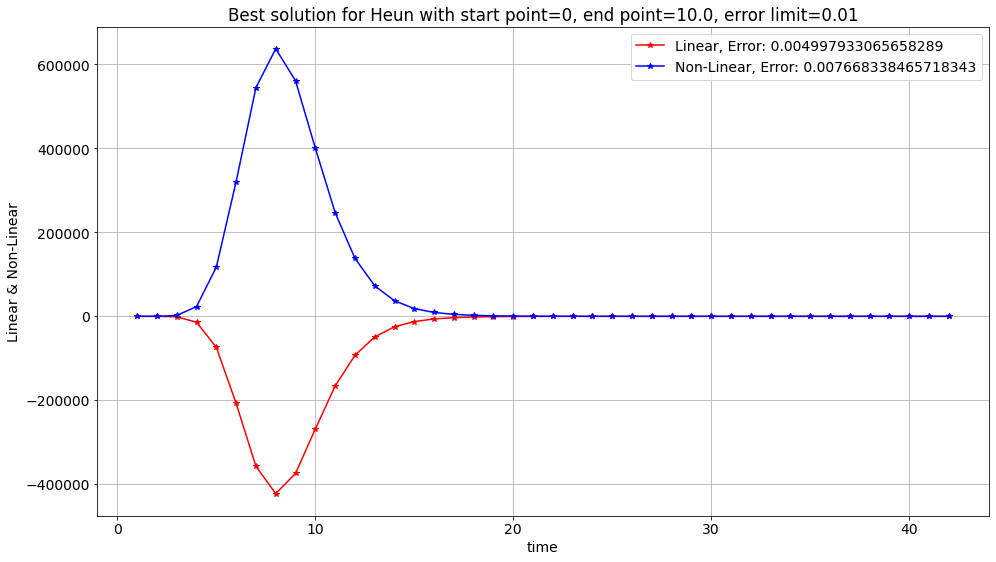

Best solution found using MidPoint,
Error: 0.004997933065658261
Error: 0.007668338465718301
Step count: 42
Step length: 0.23809523809523808
Start point: 0
End point: 10.0
Error limit: 0.01


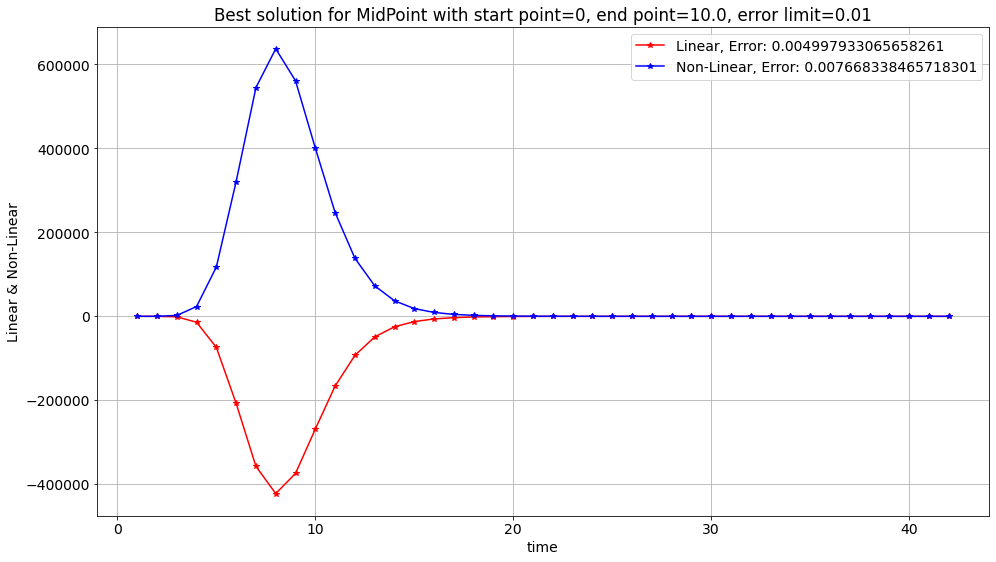

Best solution found using RK4,
Error: 0.006118480674660308
Error: 0.009266625271267788
Step count: 31
Step length: 0.3225806451612903
Start point: 0
End point: 10.0
Error limit: 0.01


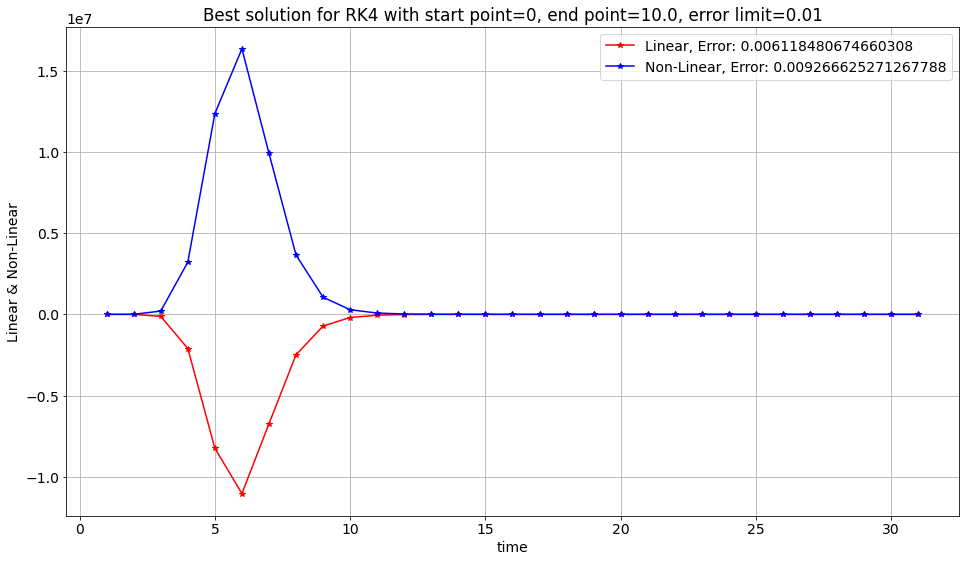

In [131]:
def func(t,Y):
    lam=2*np.sqrt(2)
    k=2
    q,i=Y
    f1=i
    f2= -k*q-lam*i
    return np.array([f1,f2])

tstart=0 #start-point
tend=10.0 #end-point
y0=np.array([0.2,0]) #initial value
N=5000 #maximum number of steps to take, this is needed to avoid going into infinite loops
errlimit=.01 #error threshold set to 1%
getHigherSolution(func, tstart, tend, y0, N, errlimit,'Euler')
getHigherSolution(func, tstart, tend, y0, N, errlimit,'Heun')
getHigherSolution(func, tstart, tend, y0, N, errlimit,'MidPoint')
getHigherSolution(func, tstart, tend, y0, N, errlimit,'RK4')
